# Convolutional Neural Network for Image Classification


In [1]:
# Import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.view(-1, 64*7*7)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [3]:
# Prepare the dataset and data loader
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5),(0.5))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:11<00:00, 890748.94it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 57338.97it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1246908.62it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3263753.43it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [5]:
# Instantiate the model, define loss and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
# Check if gpu is available
import torch

if torch.cuda.is_available():
  print(torch.cuda.get_device_name(0)) # Use torch.cuda to call device_name()

Tesla T4


In [24]:
# Train the model for 5 epochs
import time
current_time=time.time()
for epoch in range(5):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Forward pass
        output=model(data)

        # Compute loss
        loss=criterion(output, target)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % 100==0:
            print(f"Epoch {epoch+1}; Batch {batch_idx+1}; Loss:{loss.item()}")
trainning_time=time.time()-current_time

Epoch 1; Batch 1; Loss:0.003212185576558113
Epoch 1; Batch 101; Loss:0.0028084537480026484
Epoch 1; Batch 201; Loss:0.00029604966402985156
Epoch 1; Batch 301; Loss:0.01290691178292036
Epoch 1; Batch 401; Loss:0.001481199054978788
Epoch 1; Batch 501; Loss:0.00013274812954477966
Epoch 1; Batch 601; Loss:2.4293465685332194e-05
Epoch 1; Batch 701; Loss:0.0006288426811806858
Epoch 1; Batch 801; Loss:0.019965915009379387
Epoch 1; Batch 901; Loss:0.002399831311777234
Epoch 2; Batch 1; Loss:0.0008539435802958906
Epoch 2; Batch 101; Loss:0.007580556441098452
Epoch 2; Batch 201; Loss:0.0002190614613937214
Epoch 2; Batch 301; Loss:1.6018467476897058e-06
Epoch 2; Batch 401; Loss:0.001445597386918962
Epoch 2; Batch 501; Loss:0.00012882174632977694
Epoch 2; Batch 601; Loss:0.0005379394278861582
Epoch 2; Batch 701; Loss:0.008738911710679531
Epoch 2; Batch 801; Loss:0.0009064828045666218
Epoch 2; Batch 901; Loss:0.015318986028432846
Epoch 3; Batch 1; Loss:0.018635647371411324
Epoch 3; Batch 101; Loss:

In [25]:
print(f"Training time (second): {trainning_time}")

Training time (second): 392.07121753692627


In [20]:
def show_images(images, labels, predictions=None):
    images = images.numpy()
    fig, axes = plt.subplots(1, len(images), figsize=(12, 12))
    for i, ax in enumerate(axes):
        ax.imshow(np.squeeze(images[i]), cmap="gray")
        label = labels[i].item()
        title = f"Label: {label}"
        if predictions is not None:
            pred = predictions[i].item()
            title += f", Pred: {pred}"
        ax.set_title(title)
        ax.axis("off")
    plt.show()

Displaying a batch of test images with actual labels:


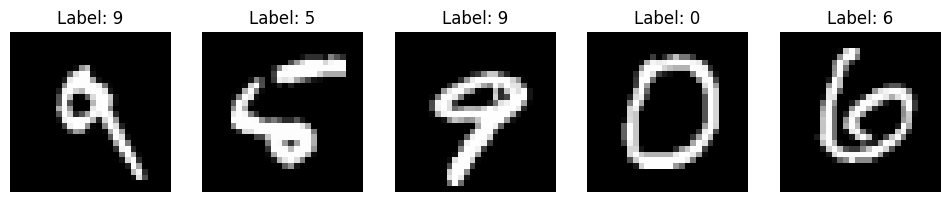

In [21]:
# View some test images with actual labels
data_iter = iter(test_loader)
images, labels = next(data_iter)

print("Displaying a batch of test images with actual labels:")
show_images(images[7:12], labels[7:12])

Displaying the same images with predicted labels:


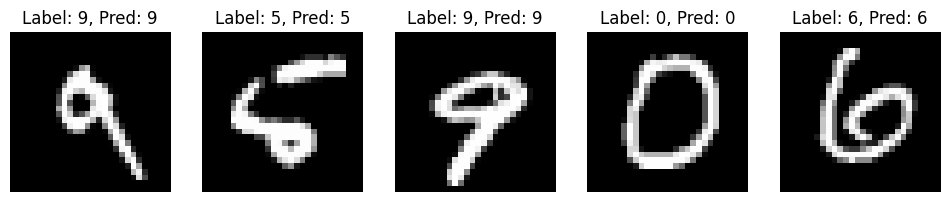

In [22]:
# Make predictions on test data
model.eval()  # Set model to evaluation mode
with torch.no_grad():  # Disable gradient calculation for inference
    output = model(images)
    _, predictions = torch.max(output, 1)  # Get the index of the max log-probability

print("Displaying the same images with predicted labels:")
show_images(images[7:12], labels[7:12], predictions[7:12])

Accuracy: 0.9915

Classification Report:
               precision    recall  f1-score   support

           0     0.9979    0.9898    0.9939       980
           1     0.9982    0.9930    0.9956      1135
           2     0.9846    0.9922    0.9884      1032
           3     0.9931    0.9960    0.9946      1010
           4     0.9929    1.0000    0.9964       982
           5     0.9856    0.9944    0.9900       892
           6     0.9896    0.9927    0.9911       958
           7     0.9874    0.9912    0.9893      1028
           8     0.9927    0.9836    0.9881       974
           9     0.9920    0.9822    0.9871      1009

    accuracy                         0.9915     10000
   macro avg     0.9914    0.9915    0.9914     10000
weighted avg     0.9915    0.9915    0.9915     10000



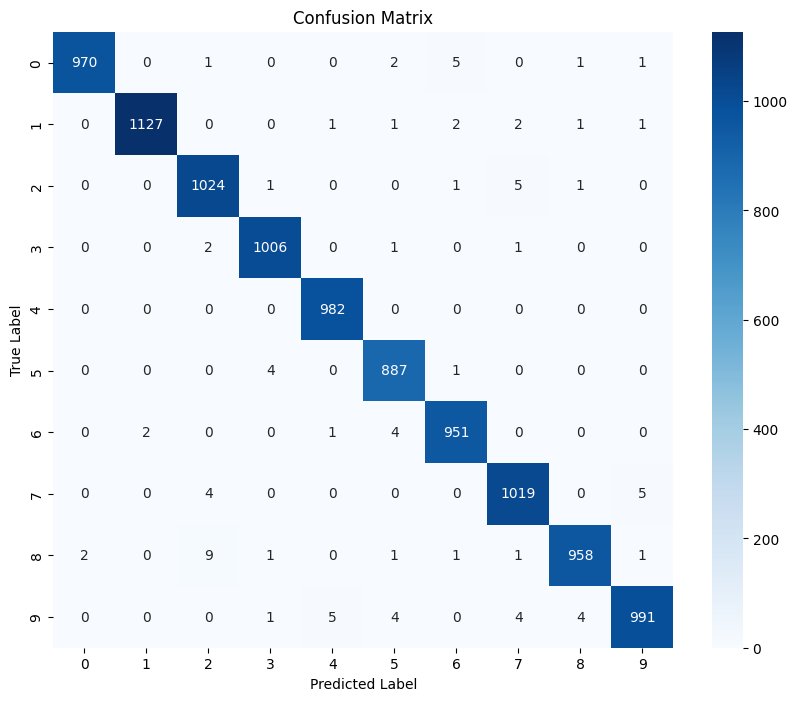

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
# Function to evaluate the model on the test set and generate classification metrics
def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, preds = torch.max(output, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(target.cpu().numpy())

    # Calculate classification metrics
    cm = confusion_matrix(all_labels, all_preds)
    accuracy = accuracy_score(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, digits=4)

    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", report)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# Load the test data
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Call the function to evaluate the model
evaluate_model(model, test_loader)